# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn import metrics
from scipy.stats import ks_2samp

In [171]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [172]:
metadados = pd.DataFrame({'dtypes': df.dtypes})
metadados['missing'] = df.isna().sum()
metadados['perc_missing'] = round((metadados['missing']/df.shape[0])*100)
metadados['valores_unicos'] = df.nunique()
metadados

,dtypes,missing,perc_missing,valores_unicos
age,float64,0,0.0,41
sex,float64,0,0.0,2
cp,float64,0,0.0,4
trestbps,float64,0,0.0,50
chol,float64,0,0.0,152
fbs,float64,0,0.0,2
restecg,float64,0,0.0,3
thalach,float64,0,0.0,91
exang,float64,0,0.0,2
oldpeak,float64,0,0.0,40


In [173]:
print('\nEstatísticas descritivas:')
df.describe()



Estatísticas descritivas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num,flag_doente
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,1.000000


In [174]:
print('\nEstatísticas descritivas:')
df.describe(include=object)


Estatísticas descritivas:


,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


A base de dados substitui missing values pelo caractere `?`. Com a verificação acima não foi possível identificar os missing values, portanto será necessária uma nova verificação:

In [175]:
mask = df.map(lambda x: x == '?')
mask = mask.astype(int)
mask.sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             4
thal           2
num            0
flag_doente    0
dtype: int64

Como mostrado acima, as variáveis `ca` e `thal` possuem o caractere identificador de missing values. Trocaremos esses valores pela méida da coluna de cada um.

In [176]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)

Verificando se ainda há missign values:

In [177]:
df.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

##### Gráfico da distribuição da variável idade:

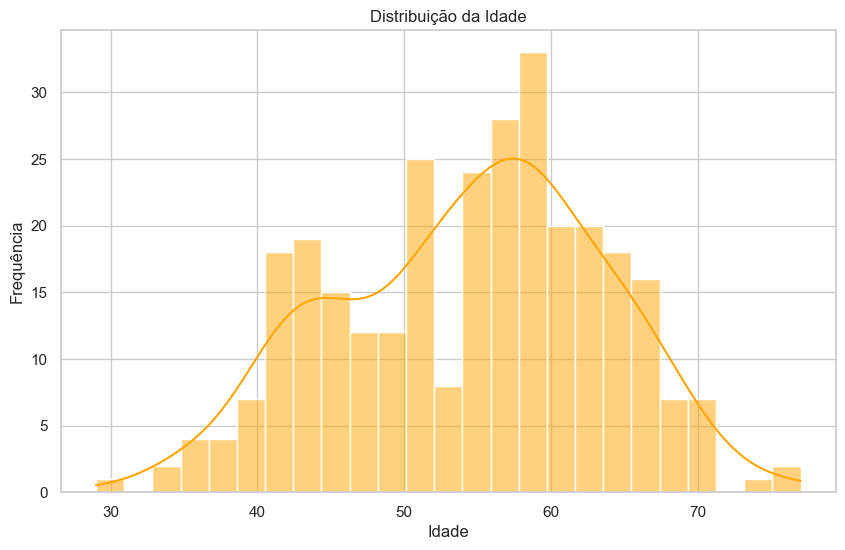

In [178]:
# Configurando o estilo do gráfico
sns.set(style='whitegrid')

# Gráfico de distribuição da idade
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], 
             kde=True, 
             color='orange',
             bins=25)

plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Pode-se verificar que há uma maior quantidade de cadastros por volta dos 60 anos de idade.

##### Gráfico da distribuição da variável `flag_doente`:

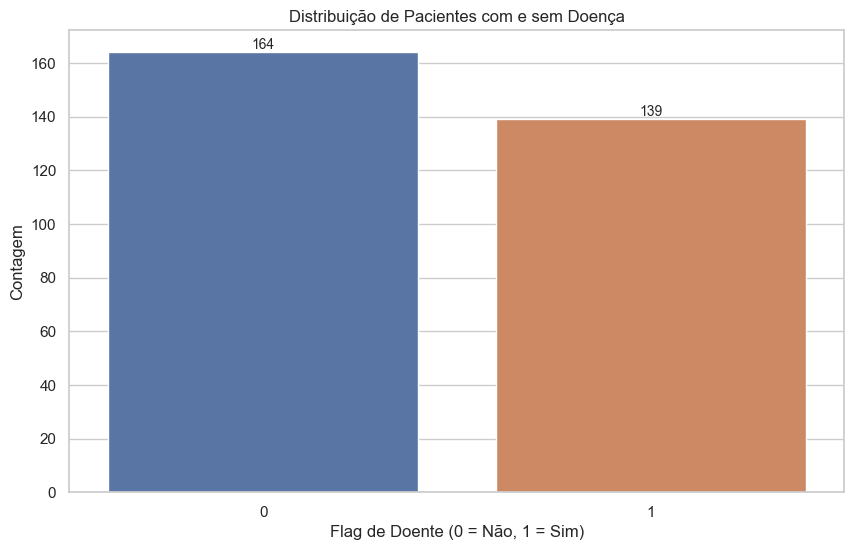

In [179]:
# Gráfico de distribuição de doentes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='flag_doente', 
                   hue='flag_doente',
                   data=df,
                   legend=False)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

plt.title('Distribuição de Pacientes com e sem Doença')
plt.xlabel('Flag de Doente (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

Há mais pessoas saudaveis do que doentes.

##### Gráfico distribuição da variável `flag_doente` pela variavel `age`:

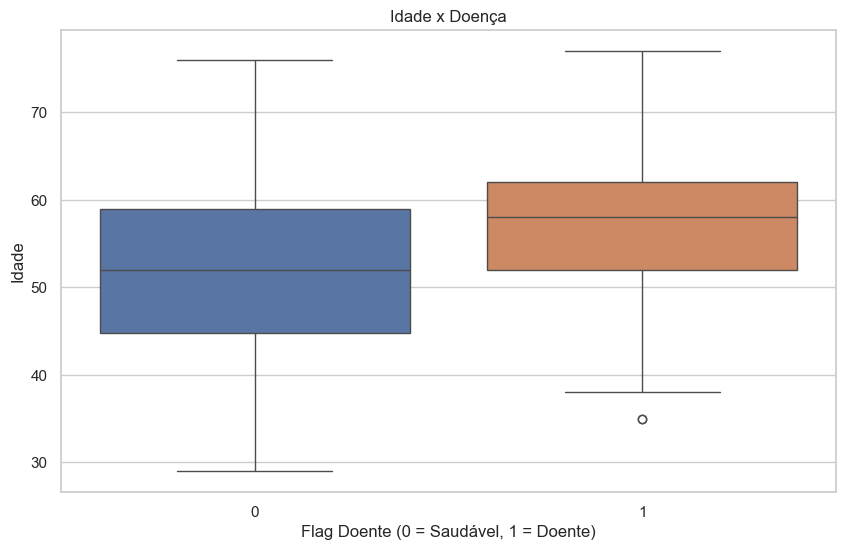

In [180]:
# Gráfico de boxplot entre idade e a variável flag_doente
plt.figure(figsize=(10, 6))
sns.boxplot(x='flag_doente', 
            y='age', 
            hue='flag_doente', 
            data=df, 
            legend=False)

plt.title('Idade x Doença')
plt.xlabel('Flag Doente (0 = Saudável, 1 = Doente)')
plt.ylabel('Idade')
plt.show()

Para os indivíduos saudaveis a distribuição dos dados parece simétrica, já que a linha que representa a mediana se encontra no meio da caixa. Já para os indivíduos doentes a distribuição dos dados é assimétroca, pois a linha da mediana se encontra deslocada para cima, com um dado fora do intervalo representando um possível outlier.

##### Gráfico distribuição do colesterol pela idade:

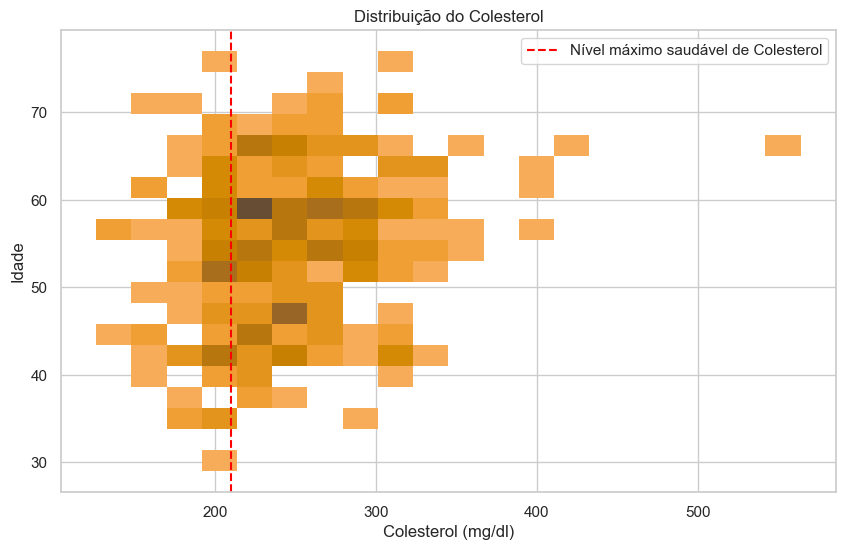

In [181]:
# Visualizando a distribuição do colesterol
plt.figure(figsize=(10, 6))
ax = sns.histplot(x='chol', 
                  y='age', 
                  data=df, 
                  color='orange', 
                  bins=20)

ax.axvline(x=210, 
           color='red', 
           linestyle='--', 
           label='Nível máximo saudável de Colesterol')

plt.title('Distribuição do Colesterol')
plt.xlabel('Colesterol (mg/dl)')
plt.ylabel('Idade')
ax.legend()
plt.show()

Percebe-se um aumento gradual nos níveis de colesterol conforme a idade aumenta. Com menos indivíduos de idade avançada com colesterol em níveis saudaveis. 

##### Gráfico da distribuição da pressão arterial pela idade:

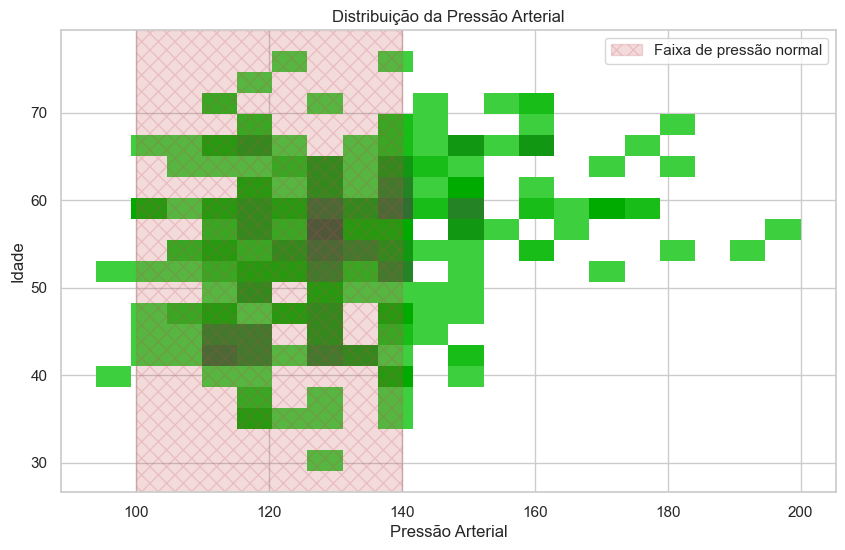

In [182]:

# Visualizando a distribuição da pressão arterial
plt.figure(figsize=(10, 6))
sns.histplot(x='trestbps', 
             y='age', 
             data=df, 
             color='green', 
             bins=20)

plt.axvspan(100, 140, 
            color='r', 
            alpha=0.2, 
            hatch='xx', 
            label='Faixa de pressão normal')

plt.title('Distribuição da Pressão Arterial')
plt.xlabel('Pressão Arterial')
plt.ylabel('Idade')
plt.legend()
plt.show()

Nota-se que a maior parte dos indivíduos se encontram na faixa de pressão considerada normal. Porém aqueles que se encontram fora, em sua maioria são de idade mais avançada.

##### Gráfico da distribuição da variável `flag_doente` por sexo:

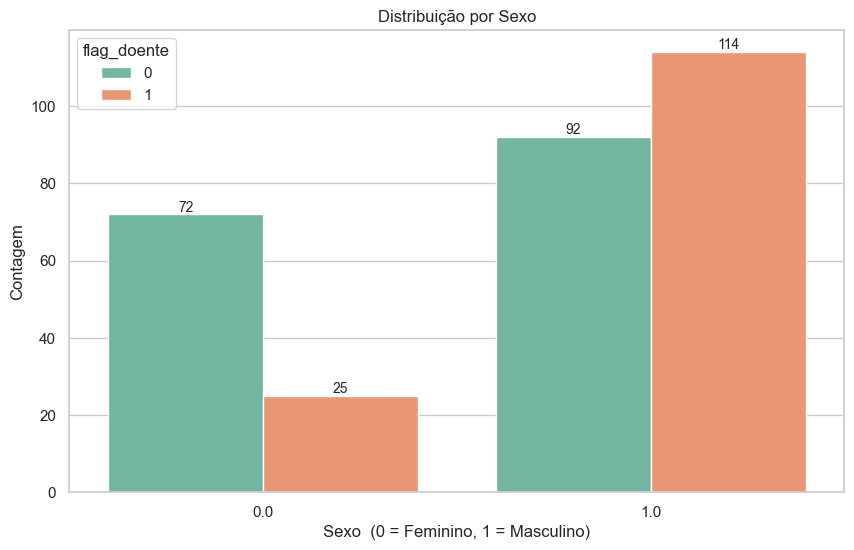

In [183]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='sex', 
                   hue='flag_doente',
                   data=df, 
                   palette='Set2')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
    
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo  (0 = Feminino, 1 = Masculino)')
plt.ylabel('Contagem')
plt.show()

Proporcionalmente há mais individuos do sexo masculino doentes do que do sexo feminino.

##### Matriz correlação das variáveis da base de dados:

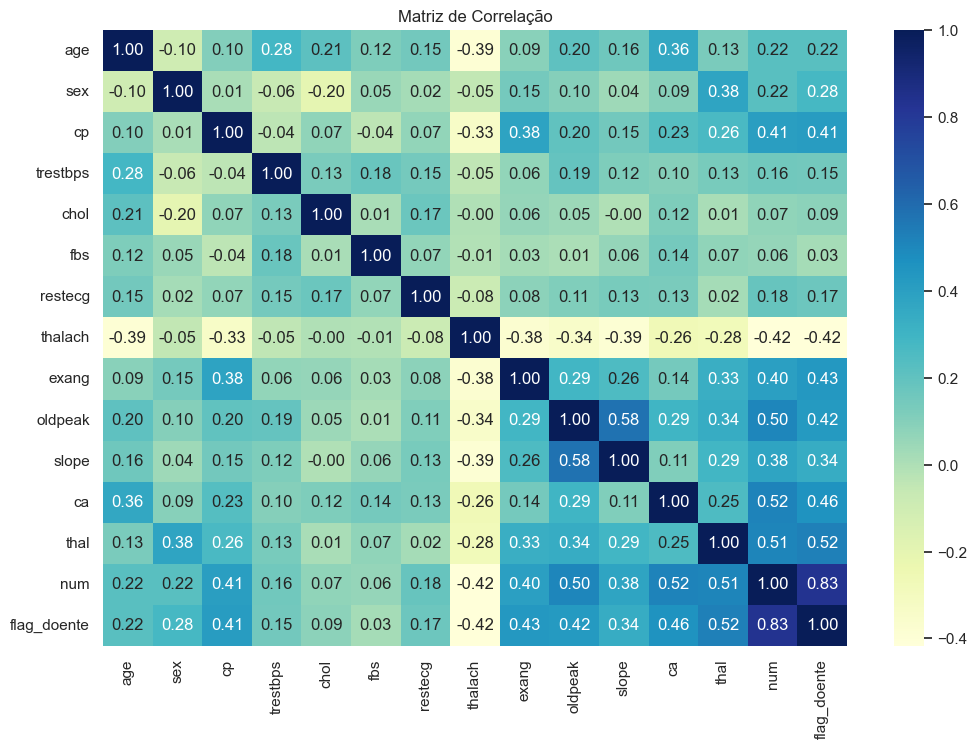

In [184]:
# Matriz de correlação
df_numerico = df.select_dtypes(include=['number'])
df_numerico = df_numerico.dropna()
correlation_matrix = df_numerico.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='YlGnBu', 
            cbar=True)

plt.title('Matriz de Correlação')
plt.show()

Com isso pode-se verificar quais variáveis possuem maior correlação para melhorara o modelo.

##### Distribuição da idade pelo colesterol identificando os doentes:

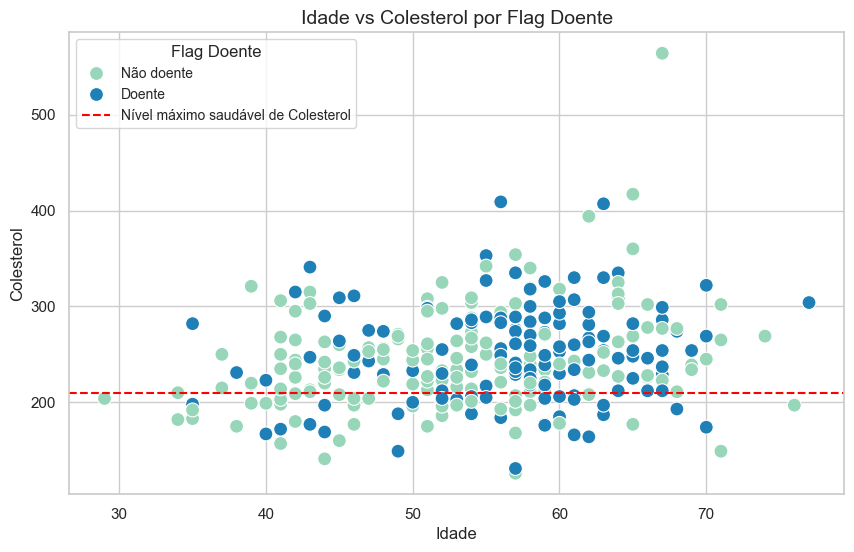

In [185]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='age', 
                     y='chol', 
                     hue='flag_doente', 
                     data=df, 
                     palette='YlGnBu', 
                     s=100)

ax.axhline(y=210, 
           color='red', 
           linestyle='--', 
           label='line')

handles, labels = ax.get_legend_handles_labels()
custom_labels = ['Não doente', 'Doente', 'Nível máximo saudável de Colesterol']
ax.legend(handles=handles,
          labels=custom_labels, 
          title='Flag Doente', 
          fontsize=10)

plt.title('Idade vs Colesterol por Flag Doente', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Colesterol', fontsize=12)
plt.show()

A distribuição de doentes se concentra em indivíduos com idade mais avançada, porém a distribuição dos valores de colesterol não explica de maneira acertiva a doença. Sendo um interpretação válida, o fato de indivíduos com a idade mais avançada com niveís de colesterol não saudaveis, serem a maior concentração de doentes. 

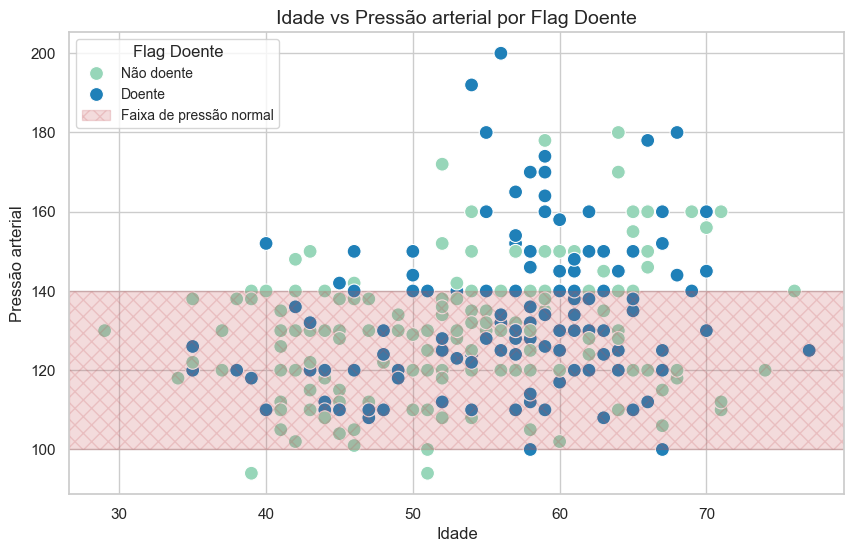

In [186]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='age', 
                     y='trestbps', 
                     hue='flag_doente', 
                     data=df, 
                     palette='YlGnBu', 
                     s=100)

ax.axhspan(140, 100, 
           color='r', 
           alpha=0.2, 
           hatch='xx', 
           label='span')

handles, labels = ax.get_legend_handles_labels()
custom_labels = ['Não doente', 'Doente', 'Faixa de pressão normal']

ax.legend(handles=handles, 
          labels=custom_labels, 
          title='Flag Doente', 
          loc='upper left', 
          bbox_to_anchor=(0, 1), 
          fontsize=10)

plt.title('Idade vs Pressão arterial por Flag Doente', fontsize=14)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Pressão arterial', fontsize=12)
plt.show()

Verifica-se que a maior concentração de doentes se encontra em indivíduos com idade mais avançada. O mesmo se repete para a a pressão arterial.

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [187]:
def bivariada (df: pd.DataFrame, var_expl: str, var_resp: str):

    tab = pd.crosstab(df[var_expl], df[var_resp], margins= True)

    # Renomeando as colunas para melhor visualização
    tab.columns = ['nao_doente', 'doente', 'total']

    # Calculando a proporção de doentes em cada grupo de idade (mean)
    tab['mean'] = tab['doente'] / (tab['nao_doente'] + tab['doente'])

    # Calculando a razão de chances (odds) para cada grupo
    tab['odds'] = tab['doente'] / tab['nao_doente']

    # Calculando o odds_ratio em relação ao total (linha 'All')
    tab['odds_ratio'] = tab['odds'] / tab.loc['All', 'odds']

    # Calculando o 'logito' 
    tab['logito'] = np.log(tab['odds'].replace(0, np.nan))  

    # Calculando 'WOE' (Weight of Evidence)
    tab['WOE'] = np.log(tab['odds_ratio'].replace(0, np.nan))
    return tab

Bivariada para a variável `exang`:

In [188]:
bivariada(df, 'exang', 'flag_doente')

,nao_doente,doente,total,mean,odds,odds_ratio,logito,WOE
exang,,,,,,,,
0.0,141,63,204,0.308824,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,0.767677,3.304348,3.898655,1.195239,1.360632
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


Bivariada para a variável `sex`:

In [189]:
bivariada(df, 'sex', 'flag_doente')

,nao_doente,doente,total,mean,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [190]:
def bivariada_quebra (df: pd.DataFrame, var_expl: str, var_resp: str):

    name_var = 'grupo_'+var_expl
    df[name_var] = pd.qcut(df[var_expl], 5)

    tab = pd.crosstab(df[name_var], df[var_resp], margins=True)

    # Renomeando as colunas para melhor visualização
    tab.columns = ['nao_doente', 'doente', 'total']

    # Calculando a proporção de doentes em cada grupo de idade (mean)
    tab['mean'] = tab['doente'] / (tab['nao_doente'] + tab['doente'])

    # Calculando a razão de chances (odds) para cada grupo
    tab['odds'] = tab['doente'] / tab['nao_doente']

    # Calculando o odds_ratio em relação ao total (linha 'All')
    tab['odds_ratio'] = tab['odds'] / tab.loc['All', 'odds']

    # Calculando o 'logito' 
    tab['logito'] = np.log(tab['odds'].replace(0, np.nan))  

    # Calculando 'WOE' (Weight of Evidence)
    tab['WOE'] = np.log(tab['odds_ratio'].replace(0, np.nan))

    # Calculando a média de 'var_expl' para cada grupo
    mean_var_expl = df.groupby(name_var, observed= False)[var_expl].mean().reset_index()
    mean_var_expl.columns = [name_var, 'mean_'+var_expl]

    # Adicionando a média de 'var_expl' à tabela
    tab = tab.merge(mean_var_expl, on=name_var, how='left')
    return tab

Bivariada para a variável colesterol:

In [191]:
bivariada_quebra(df, 'chol', 'flag_doente')

,grupo_chol,nao_doente,doente,total,mean,odds,odds_ratio,logito,WOE,mean_chol
0,"(125.999, 204.0]",37,25,62,0.403226,0.675676,0.797200,-0.392042,-0.226650,184.451613
1,"(204.0, 230.0]",36,24,60,0.400000,0.666667,0.786571,-0.405465,-0.240073,217.916667
2,"(230.0, 254.0]",36,26,62,0.419355,0.722222,0.852118,-0.325422,-0.160030,241.919355
3,"(254.0, 286.0]",27,32,59,0.542373,1.185185,1.398348,0.169899,0.335292,269.288136
4,"(286.0, 564.0]",28,32,60,0.533333,1.142857,1.348407,0.133531,0.298924,322.500000
5,All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


Bivariada para a variável pressão arterial:

In [192]:
bivariada_quebra(df, 'trestbps', 'flag_doente')

,grupo_trestbps,nao_doente,doente,total,mean,odds,odds_ratio,logito,WOE,mean_trestbps
0,"(93.999, 120.0]",60,37,97,0.381443,0.616667,0.727578,-0.483427,-0.318034,113.463918
1,"(120.0, 126.0]",10,15,25,0.600000,1.500000,1.769784,0.405465,0.570858,124.320000
2,"(126.0, 134.0]",35,27,62,0.435484,0.771429,0.910175,-0.259511,-0.094119,130.177419
3,"(134.0, 144.6]",34,24,58,0.413793,0.705882,0.832840,-0.348307,-0.182914,139.103448
4,"(144.6, 200.0]",25,36,61,0.590164,1.440000,1.698993,0.364643,0.530036,158.180328
5,All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


Bivariada para a variável idade:

In [193]:
bivariada_quebra(df, 'age', 'flag_doente')

,grupo_age,nao_doente,doente,total,mean,odds,odds_ratio,logito,WOE,mean_age
0,"(28.999, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
1,"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
2,"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
3,"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
4,"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
5,All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [194]:
reg = smf.logit('flag_doente ~ sex + cp + trestbps + age', data=df).fit()
reg.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.2605
Time:                        18:50:33   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.331      5.444      0.000       1.153       2.451
cp             1.1403      0.169      6.739      0.000       0.809       1.472
trestbps       0.0214      0.008      2.600      0.009       0.005       0.037
age            0.0582      0.017      3.348      0.001       0.024       0.092
==============================================================================
"""

Todas as variáveis apresentam um p-value menor que 5%, portanto todas as colocadas no modelo são significativas.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [195]:
df['predito'] = reg.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,grupo_chol,grupo_trestbps,grupo_age,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(230.0, 254.0]","(144.6, 200.0]","(62.0, 77.0]",0.196041
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(254.0, 286.0]","(144.6, 200.0]","(62.0, 77.0]",0.928431
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(204.0, 230.0]","(93.999, 120.0]","(62.0, 77.0]",0.846558
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(230.0, 254.0]","(126.0, 134.0]","(28.999, 45.0]",0.276207
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(125.999, 204.0]","(126.0, 134.0]","(28.999, 45.0]",0.024768


In [196]:
# Criando faixas para os valores preditos
grupo_pred = pd.qcut(df['predito'], 5, duplicates='drop')

# Agrupando pelas faixa criadas
grupo_reg = df.groupby(grupo_pred, observed=False) 

# Calculando a quantidade de cada grupo
qualid = grupo_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})

# Calculando a média predita de cada grupo
qualid['predito'] = grupo_reg['predito'].mean()

# Calculando a probabilidade de doentes por grupo
qualid['prob_doentes'] = grupo_reg['flag_doente'].mean()
qualid

,contagem,predito,prob_doentes
predito,,,
"(0.0119, 0.146]",61,0.076255,0.098361
"(0.146, 0.349]",60,0.249060,0.183333
"(0.349, 0.575]",61,0.457982,0.491803
"(0.575, 0.772]",60,0.673059,0.683333
"(0.772, 0.928]",61,0.837449,0.836066


Text(0.5, 0, 'Grupo')

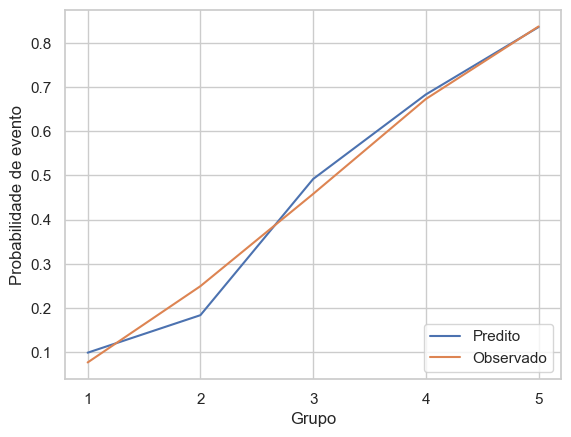

In [197]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['prob_doentes'].plot(label='Predito')
ax = qualid['predito'].plot(label='Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

Os valores preditos são bem próximos dos valores observados.

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

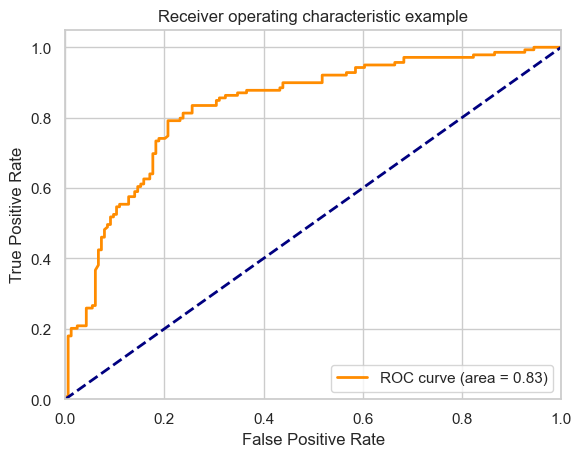

In [198]:
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

A curva ROC está bem acentuada com o AUC de 0.83.

In [199]:
#Acuracia
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

metricas = {'acuracia': acc, 'AUC': auc_, 'gini': gini, 'ks': ks}
comp = pd.DataFrame([metricas], index=['model_old'])
comp

Acurácia: 77.89%
KS: 58.40% 
AUC: 83.11% 
GINI: 66.22%


,acuracia,AUC,gini,ks
model_old,0.778878,0.831111,0.662221,0.58405


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

Utilizando todas as variáveis com maior correlação com `flag_doente` para obter melhores resultados:

In [200]:
reg2 = smf.logit('flag_doente ~ sex + cp + trestbps + thal + ca + exang + oldpeak + slope', data=df).fit()
reg2.summary()

Optimization terminated successfully.
         Current function value: 0.363021
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.4737
Time:                        18:50:36   Log-Likelihood:                -110.00
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.693e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.5529      1.753     -5.450      0.000     -12.988      -6.118
sex            0.9780      0.428      2.285      0.022       0.139       1.817
cp             0.6760      0.187      3.618      0.000       0.310       1.042
trestbps       0.0190      0.010      1.922      0.055      -0.000       0.038
thal           0.3491      0.095      3.666      0.000       0.162       0.536
ca             1.1731      0.234      5.007      0.000       0.714       1.632
exang          1.1105      0.392      2.836      0.005       0.343       1.878
oldpeak        0.3453      0.201      1.722      0.085      -0.048       0.738
slope          0.6099      0.328      1.857      0.063      -0.034       1.254
==============================================================================
"""

Criando a variável `predito` para avaliar as métricas:

In [201]:
df['predito'] = reg2.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,grupo_chol,grupo_trestbps,grupo_age,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(230.0, 254.0]","(144.6, 200.0]","(62.0, 77.0]",0.394152
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(254.0, 286.0]","(144.6, 200.0]","(62.0, 77.0]",0.989841
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(204.0, 230.0]","(93.999, 120.0]","(62.0, 77.0]",0.988149
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(230.0, 254.0]","(126.0, 134.0]","(28.999, 45.0]",0.501155
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(125.999, 204.0]","(126.0, 134.0]","(28.999, 45.0]",0.026746


Criando faixas do valor predito e agrupando utilizando as mesmas faixas:

In [202]:
# Criando faixas para os valores preditos
grupo_pred = pd.qcut(df['predito'], 5, duplicates='drop')

# Agrupando pelas faixa criadas
grupo_reg = df.groupby(grupo_pred, observed=False) 

# Calculando a quantidade de cada grupo
qualid = grupo_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})

# Calculando a média predita de cada grupo
qualid['predito'] = grupo_reg['predito'].mean()

# Calculando a probabilidade de doentes por grupo
qualid['prob_doentes'] = grupo_reg['flag_doente'].mean()
qualid

,contagem,predito,prob_doentes
predito,,,
"(0.009399999999999999, 0.0713]",61,0.042300,0.049180
"(0.0713, 0.206]",60,0.131564,0.150000
"(0.206, 0.581]",61,0.371707,0.344262
"(0.581, 0.92]",60,0.779999,0.800000
"(0.92, 0.999]",61,0.968062,0.950820


Análisando a proximidade dos valores preditos com os valores observados:

Text(0.5, 0, 'Grupo')

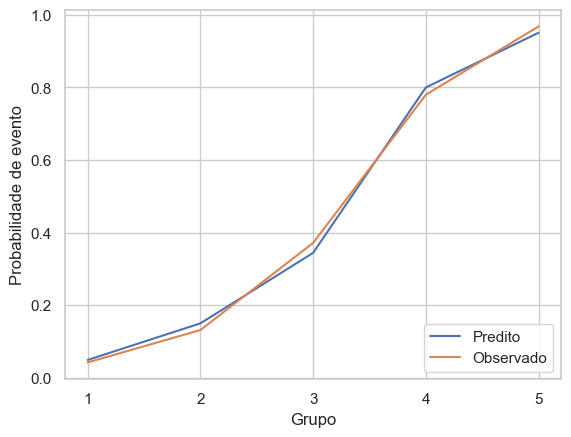

In [205]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['prob_doentes'].plot(label='Predito')
ax = qualid['predito'].plot(label='Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

Análise da curva ROC:

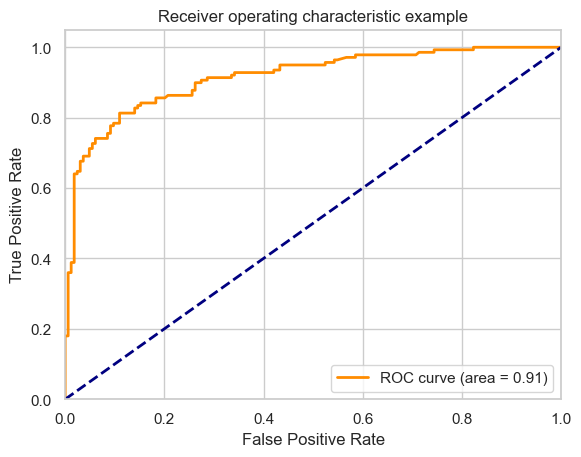

In [203]:
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

A curva ROC está mais acentuada com um valor de AUC mais elevado, de 0.91.

In [204]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))
metricas_novas = {'acuracia': acc, 'AUC': auc_, 'gini': gini, 'ks': ks}
comp.loc['model_new'] = metricas_novas
comp

Acurácia: 84.49%
KS: 70.32% 
AUC: 91.45% 
GINI: 82.90%


,acuracia,AUC,gini,ks
model_old,0.778878,0.831111,0.662221,0.584050
model_new,0.844884,0.914524,0.829049,0.703194


Como pode-se notar, todos os valores aumentaram em comparação ao modelo anterior.